# Examples from Chapter 2

### Remark 2.28 (1D case -- empirical measures).

Here, $\mathcal{X} = \mathbb{R}$, $\alpha = \frac{1}{n} \sum_{i=1}^n \delta_{x_i}$ and $\beta = \frac{1}{n} \sum_{j=1}^n \delta_{y_j}$.

Suppose that the points are ordered, i.e. $x_1 \leq \dots \leq x_n$ and $y_1 \leq \dots \leq y_n$.


Then,

$$
\mathcal{W}_p ( \alpha,  \beta)^p = \frac{1}{n} \sum_{i=1}^n | x_i - y_i |^p
$$

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

set up one-dimensional measures

In [11]:
size = 5
support_alpha = np.sort(np.random.uniform(0, 1, size))
support_beta = np.sort(np.random.uniform(0, 1, size))
# print(f"support alpha: {support_alpha}\nsupport beta:{support_beta}")

In [12]:
mass_alpha = np.ones(size) / size
# mass_alpha

In [13]:
mass_beta = np.ones(size) / size
# mass_beta

In [14]:
p = 2

In [15]:
from scipy.spatial.distance import cdist

C = cdist(support_alpha[:, np.newaxis],
          support_beta[:, np.newaxis])
C = np.power(C,p)
#C

In [16]:
a = mass_alpha
b = mass_beta

Optimal Transport Plan:
Final Transport Cost: 0.11942629192630934


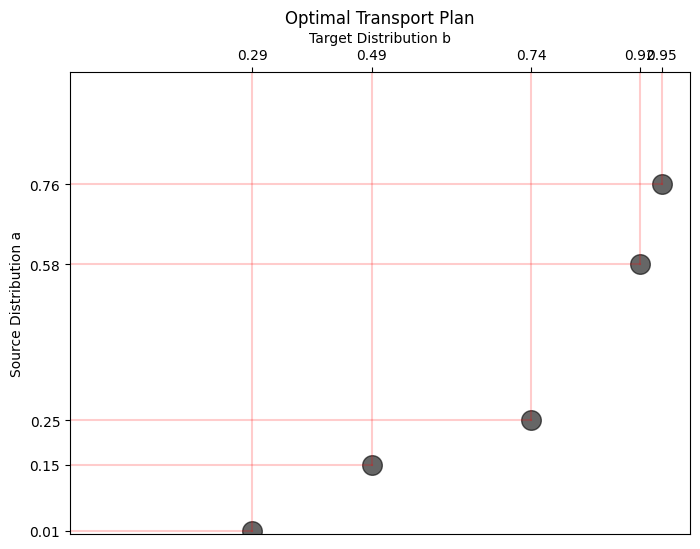

In [17]:
from scipy.optimize import linprog

# Flatten the cost matrix for the objective function
c = C.flatten()

# Equality constraints matrix A_eq and vector b_eq
# Constraints to ensure the sum of transported mass equals the probability vectors
A_eq = []
b_eq = []

# Supply constraints
for i in range(len(a)):
    constraint = np.zeros(C.shape)
    constraint[i, :] = 1
    A_eq.append(constraint.flatten())
    b_eq.append(a[i])

# Demand constraints
for j in range(len(b)):
    constraint = np.zeros(C.shape)
    constraint[:, j] = 1
    A_eq.append(constraint.flatten())
    b_eq.append(b[j])

A_eq = np.array(A_eq)
b_eq = np.array(b_eq)

# Bounds for each variable (all should be non-negative)
x_bounds = [(0, None) for _ in range(len(c))]

# Solve the linear programming problem
result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=x_bounds, method='highs')

# Display the result
if result.success:
    optimal_transport_plan = result.x.reshape(C.shape)
    print("Optimal Transport Plan:")
    # print(optimal_transport_plan)
    final_cost = np.sum(optimal_transport_plan * C)
    print("Final Transport Cost:", final_cost)
    plt.figure(figsize=(8, 6))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    ax = plt.gca()
    for i in range(len(support_alpha)):
        for j in range(len(support_beta)):
            x = support_alpha[i]
            y = support_beta[j]
            plt.scatter(y, x,
                        s=optimal_transport_plan[j, i] * 1000,
                        c='black',# Scale the size for better visibility
                        alpha=0.6)
            plt.axvline(x=y,
                        ymin=x,
                        color='red',
                        linestyle='-',
                        alpha=optimal_transport_plan[j, i])

            plt.axhline(y=x,
                        xmax=y,
                        color='red',
                        linestyle='-',
                        alpha=optimal_transport_plan[j, i])
    plt.title("Optimal Transport Plan")
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    ax.set_xticks(support_beta.flatten())
    ax.set_xticklabels([f'{x:.2f}' for x in support_beta.flatten()])
    ax.set_yticks(support_alpha.flatten())
    ax.set_yticklabels([f'{x:.2f}' for x in support_alpha.flatten()])
    plt.xlabel("Target Distribution b")
    plt.ylabel("Source Distribution a")
    plt.show()
else:
    print("Optimization failed:", result.message)

Let us compare the optimal cost the the $\ell^p$-norm between the supports, raised to the $p$-th power.

In [18]:
absolute_differences = np.abs(support_alpha - support_beta)
np.sum(np.power(absolute_differences, p)) / size

0.11942629192630931